In [213]:
library(datasets)
library(graphics)
library(grDevices)
#library(lme4)
#library(lmerTest)
#library(car)
#library(carData)
#library(multcomp)
#library(lsmeans)
library(MASS)
library(ggplot2)
library(methods)
library(Matrix)
#library(multcomp)
#library(mvtnorm)
library(stats)
library(survival)
#library(TH.data)
library(utils)
library(readr)
library(WRS2)

In [192]:
data = read_csv('AA2_Avoid_Motor_Final_28_subjcts.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  ID = col_integer(),
  Cluster_avoid_cutoff_55 = col_integer(),
  Cluster_hierarc_method_complet = col_integer(),
  Perf_Group = col_integer(),
  Order = col_integer(),
  Last6Total = col_integer(),
  STAI_T = col_integer(),
  BIS = col_integer(),
  AllAR = col_integer(),
  STAIS_Group = col_integer(),
  BIS_Group = col_integer(),
  ID2 = col_integer(),
  STAIT_Groups = col_integer(),
  BISMedian_Group = col_integer(),
  VAR00006 = col_integer(),
  AR_Group = col_integer(),
  Age = col_integer(),
  Ancestry = col_integer(),
  Sex = col_integer(),
  Marital_Status = col_integer()
  # ... with 99 more columns
)
See spec(...) for full column specifications.


In [247]:
colnames(data)

[1] "ID"                             "Cluster_avoid_cutoff_55"       
  [3] "Cluster_hierarc_method_complet" "Perf_Group"                    
  [5] "Order"                          "Last6Total"                    
  [7] "LAntIns_Motor"                  "LAntIns_Avoid"                 
  [9] "RAntIns_Motor"                  "RANtIns_Avoid"                 
 [11] "Rcaud_Motor"                    "Rcaud_Avoid"                   
 [13] "RMFG_Motor"                     "RMFG_Avoid"                    
 [15] "RIPL_Motor"                     "RIPL_Avoid"                    
 [17] "RSFG_Motor"                     "RSFG_Avoid"                    
 [19] "LMFG_Motor"                     "LMFG_Avoid"                    
 [21] "RSubgy_Diff"                    "STAI_S"                        
 [23] "STAI_T"                         "BIS"                           
 [25] "AI"                             "AllAR"                         
 [27] "STAIS_Group"                    "BIS_Group"                     
 [29] "ID2"                            "STAIT_Groups"                  
 [31] "LPostIns_Motor"                 "LPostIns_Avoid"                
 [33] "LPostCing_Motor"                "LPostCing_Avoid"               
 [35] "RPostIns_Motor"                 "RPostIns_Avoid"                
 [37] "R_Subgy_Motor"                  "R_Subgy_Avoid"                 
 [39] "Ramyg_Motor"                    "Ramyg_Avoid"                   
 [41] "LPHG_Motor"                     "LPHG_Avoid"                    
 [43] "LAmyg_Motor"                    "LAmyg_Avoid"                   
 [45] "LMTG_Motor"                     "LMTG_Avoid"                    
 [47] "LAntIns_Diff"                   "RAntIns_Diff"                  
 [49] "Rcaud_Diff"                     "RMFG_Diff"                     
 [51] "RIPL_Diff"                      "RSFG_Diff"                     
 [53] "LMFG_Diff"                      "LPostCing_Diff"                
 [55] "RPostIns_Diff"                  "LPostIns_Diff"                 
 [57] "LPHG_Diff"                      "LAmyg_Diff"                    
 [59] "Ramyg_Diff"                     "LMTG_Diff"                     
 [61] "BISMedian_Group"                "VAR00006"                      
 [63] "RPGH_LE_Early"                  "RPHG_LE_Late"                  
 [65] "RSFG_LE_Early"                  "RSFG_LE_Late"                  
 [67] "Rcaud_LE_Early"                 "Rcaud_LE_Late"                 
 [69] "RPHG_LE_Diff"                   "RSFG_LE_Diff"                  
 [71] "Rcaud_LE_Diff"                  "VSey_FC_Amyg"                  
 [73] "Vsey_Avoid"                     "VSey_Motor"                    
 [75] "Vsey_FC_AVMoDiff"               "VS_FC"                         
 [77] "LAntIns_Early"                  "LAntIns_Late"                  
 [79] "LAntins_Early_Motor"            "Lantins_Late_Motor"            
 [81] "Lantins_Late_Early"             "RAntIns_Early"                 
 [83] "RAntIns_Late"                   "RAntIns_Early_Motor"           
 [85] "RAntIns_Late_Motor"             "RAntIns_Late_Early"            
 [87] "RCaud_Early"                    "RCaud_Late"                    
 [89] "RCaud_Early_Motor"              "RCaud_Late_Motor"              
 [91] "RCaud_Late_Early"               "RMFG_Early"                    
 [93] "RMFG_Late"                      "RMFG_Early_Motor"              
 [95] "RMFG_Late_Motor"                "RMFG_Late_Early"               
 [97] "RIPL_Early"                     "RIPL_Late"                     
 [99] "RIPL_Early_Motor"               "RIPL_Late_Motor"               
[101] "RIPL_Late_Early"                "RSFG_Early"                    
[103] "RSFG_Late"                      "RSFG_Early_Motor"              
[105] "RSFG_Late_Motor"                "RSFG_Late_Early"               
[107] "LMFG_Early"                     "LMFG_Late"                     
[109] "LMFG_Early_Motor"               "LMFG_Late_Motor"               
[111] "LMFG_Late_Early"                "Lp

In [193]:
#data$Avoidance_clusters[data$Cluster_hierarc_method_complet==1]<-'good learners'
#data$Avoidance_clusters[data$Cluster_hierarc_method_complet==2]<-'stable intermediate'
#data$Avoidance_clusters[data$Cluster_hierarc_method_complet==3]<-'stable hyperavoiders'
#data$Avoidance_clusters[data$Cluster_hierarc_method_complet==4]<-'stable hypo-avoiders'

data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==1]<- 'stable SuperHyperAvoiders'
#data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==2]<-'stable Hyperavoiders'
data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==3]<-'good learners'
#data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==4]<- 'delayed learners' 
data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==5]<-'stable hypo-avoiders'

Warning message:
“Unknown or uninitialised column: 'Avoidance_clusters'.”

In [196]:
data <- data[!(is.na(data$Avoidance_clusters)), ]

# ANXIETY

## State anxiety

                        Df Sum Sq Mean Sq F value Pr(>F)
data$Avoidance_clusters  2   77.1   38.56   1.242  0.308
Residuals               22  683.1   31.05               

Warning message in t1waybt(data$STAI_S ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$STAI_S ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 531.

Test statistic: 1.361 
p-value: 0.33145 
Variance explained 0.27 
Effect size 0.52 


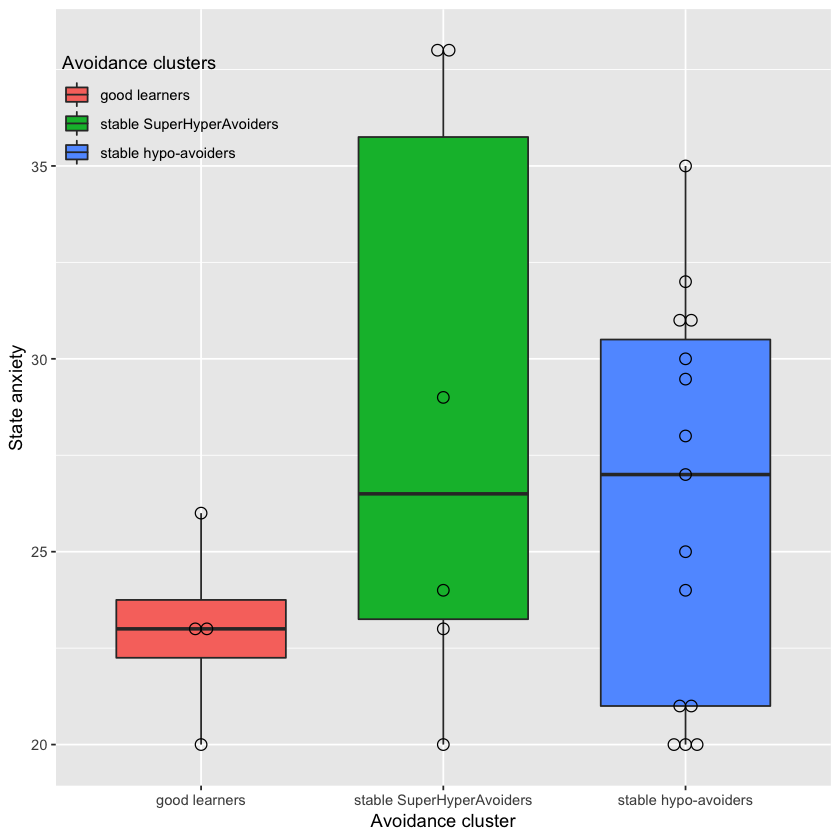

In [219]:
summary(aov(data$STAI_S ~ data$Avoidance_clusters))

t1waybt(data$STAI_S ~ data$Avoidance_clusters, tr = .2, nboot = 599)

StaiSBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, STAI_S,
                                    fill=Avoidance_clusters))
StaiSBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.3, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="State anxiety") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Trait anxiety

                        Df Sum Sq Mean Sq F value Pr(>F)
data$Avoidance_clusters  2   49.1   24.57     0.8  0.462
Residuals               22  675.4   30.70               

Warning message in t1waybt(data$STAI_T ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$STAI_T ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 539.

Test statistic: 0.3034 
p-value: 0.72171 
Variance explained 0.191 
Effect size 0.437 


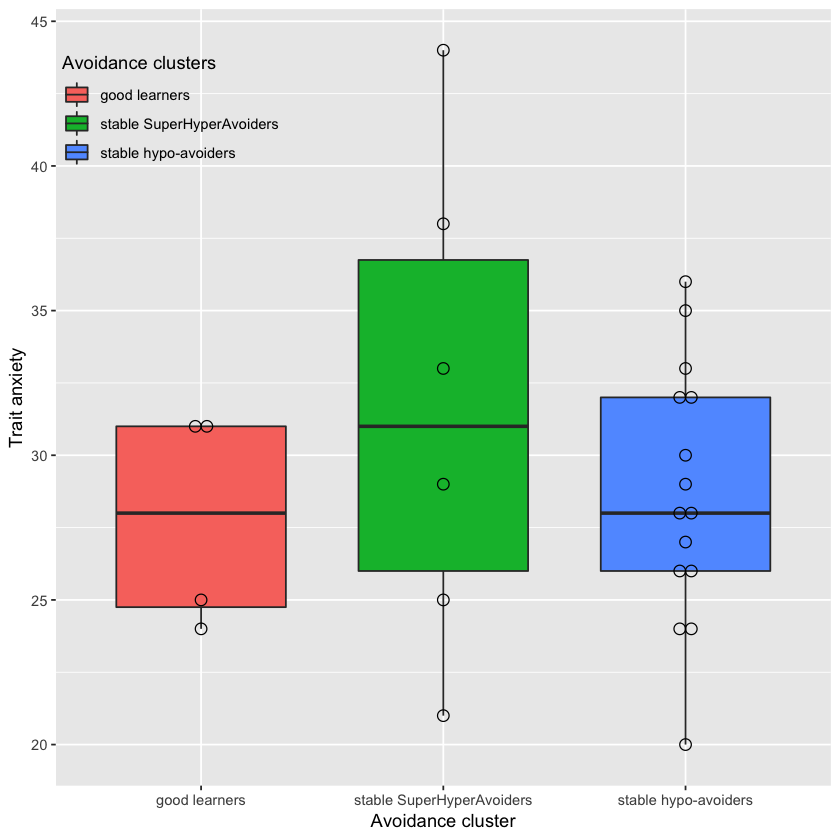

In [220]:
summary(aov(data$STAI_T ~ data$Avoidance_clusters))

t1waybt(data$STAI_T ~ data$Avoidance_clusters, tr = .2, nboot = 599)

StaiTBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, STAI_T,
                                    fill=Avoidance_clusters))
StaiTBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.4, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="Trait anxiety") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Anxiety right before the task

                        Df Sum Sq Mean Sq F value Pr(>F)  
data$Avoidance_clusters  2  10.84   5.421   5.797  0.012 *
Residuals               17  15.90   0.935                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
5 observations deleted due to missingness

Warning message in t1waybt(data$VAS_Pre ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$VAS_Pre ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 273.

Test statistic: 3.4282 
p-value: 0 
Variance explained 0.626 
Effect size 0.791 


Call:
mcppb20(formula = data$VAS_Pre ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

                                                     psihat ci.lower ci.upper
stable hypo-avoiders vs. stable SuperHyperAvoiders -1.33333 -3.66667    0.000
stable hypo-avoiders vs. good learners              0.08333 -1.37500    1.125
stable SuperHyperAvoiders vs. good learners         1.41667  0.25000    3.625
                                                   p-value
stable hypo-avoiders vs. stable SuperHyperAvoiders 0.03840
stable hypo-avoiders vs. good learners             0.85476
stable SuperHyperAvoiders vs. good learners        0.00000


Warning message:
“Removed 5 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 5 rows containing non-finite values (stat_bindot).”

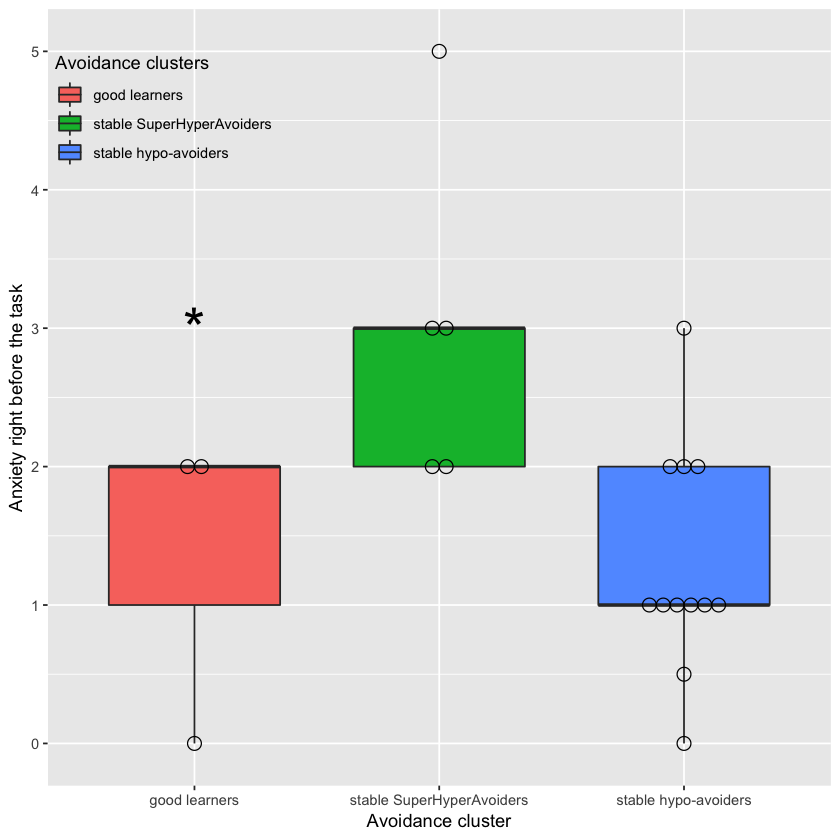

In [257]:
summary(aov(data$VAS_Pre ~ data$Avoidance_clusters))

t1waybt(data$VAS_Pre ~ data$Avoidance_clusters, tr = .2, nboot = 599)
mcppb20(data$VAS_Pre ~ data$Avoidance_clusters, tr = .2, nboot = 599)

StaiTBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, VAS_Pre,
                                    fill=Avoidance_clusters))
StaiTBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.1, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="Anxiety right before the task") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) + # Remove border around each item
    annotate("text", x=1, y=3, label="*", size=12)

## Anxiety over the task

                        Df Sum Sq Mean Sq F value Pr(>F)
data$Avoidance_clusters  2  13.87   6.937   1.557  0.239
Residuals               17  75.76   4.457               
5 observations deleted due to missingness

Warning message in t1waybt(data$VAS_Task ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$VAS_Task ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 405.

Test statistic: 2.2541 
p-value: 0.21481 
Variance explained 0.192 
Effect size 0.439 


Warning message:
“Removed 5 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 5 rows containing non-finite values (stat_bindot).”

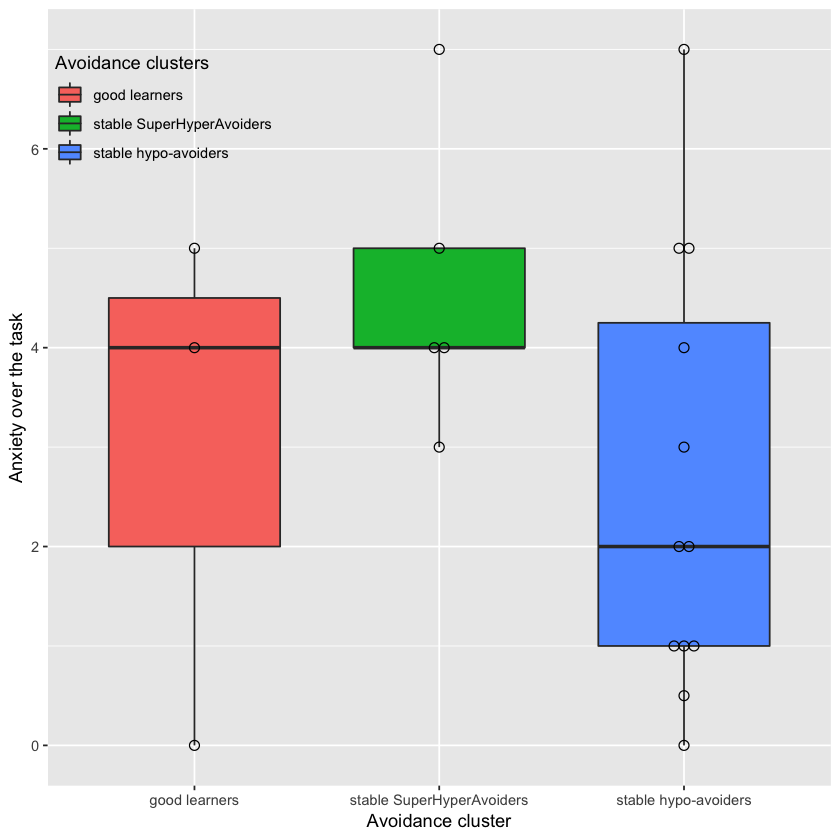

In [263]:
summary(aov(data$VAS_Task ~ data$Avoidance_clusters))

t1waybt(data$VAS_Task ~ data$Avoidance_clusters, tr = .2, nboot = 599)

StaiTBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, VAS_Task,
                                    fill=Avoidance_clusters))
StaiTBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.1, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="Anxiety over the task") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Anxiety right after the task

                        Df Sum Sq Mean Sq F value Pr(>F)  
data$Avoidance_clusters  2  5.842   2.921   3.124 0.0699 .
Residuals               17 15.896   0.935                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
5 observations deleted due to missingness

Warning message in t1waybt(data$VAS_Post ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$VAS_Post ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 0.

Test statistic: NaN 
p-value: NaN 
Variance explained 0.169 
Effect size 0.411 


Warning message:
“Removed 5 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 5 rows containing non-finite values (stat_bindot).”

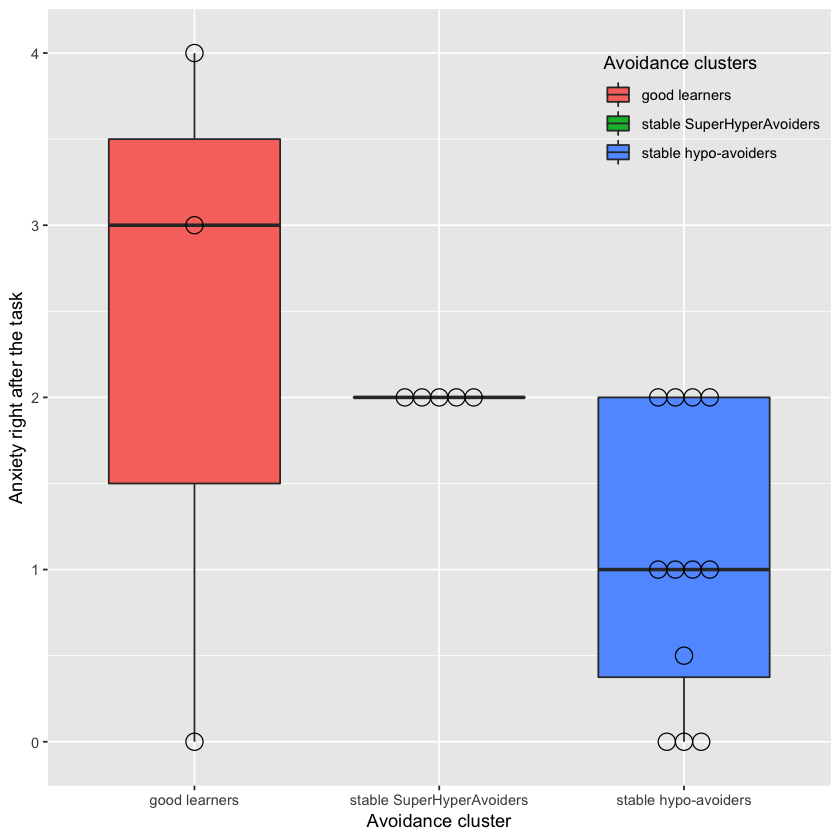

In [262]:
summary(aov(data$VAS_Post ~ data$Avoidance_clusters))

t1waybt(data$VAS_Post ~ data$Avoidance_clusters, tr = .2, nboot = 599)

StaiTBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, VAS_Post,
                                    fill=Avoidance_clusters))
StaiTBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.1, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="Anxiety right after the task") + 
    theme(legend.position=c(0.85,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

# COPING STYLES

## Acceptance coping style

                        Df Sum Sq Mean Sq F value Pr(>F)
data$Avoidance_clusters  2   8.88   4.439   0.332  0.722
Residuals               16 213.65  13.353               
6 observations deleted due to missingness

Warning message in t1waybt(data$Accept ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$Accept ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 339.

Test statistic: 0.185 
p-value: 0.66962 
Variance explained 0.13 
Effect size 0.361 


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

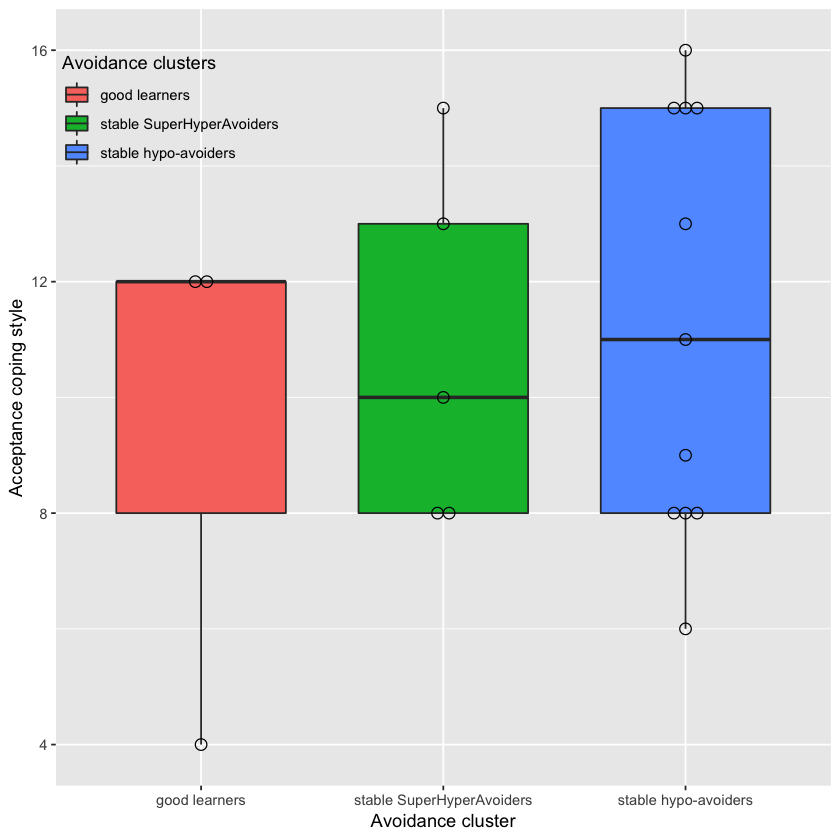

In [221]:
summary(aov(data$Accept ~ data$Avoidance_clusters))

t1waybt(data$Accept ~ data$Avoidance_clusters, tr = .2, nboot = 599)

AcceptBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Accept,
                                    fill=Avoidance_clusters))
AcceptBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.2, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="Acceptance coping style") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Active coping style

                        Df Sum Sq Mean Sq F value Pr(>F)  
data$Avoidance_clusters  2  23.91  11.956   4.141 0.0355 *
Residuals               16  46.19   2.887                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
6 observations deleted due to missingness

Warning message in t1waybt(data$Active ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$Active ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 405.

Test statistic: 7.5061 
p-value: 0.00988 
Variance explained 0.526 
Effect size 0.725 


Call:
mcppb20(formula = data$Active ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

                                                     psihat ci.lower ci.upper
stable hypo-avoiders vs. stable SuperHyperAvoiders -3.66667 -6.00000 -1.00000
stable hypo-avoiders vs. good learners             -1.61905 -4.00000  0.23810
stable SuperHyperAvoiders vs. good learners         2.04762 -0.28571  3.85714
                                                   p-value
stable hypo-avoiders vs. stable SuperHyperAvoiders 0.00000
stable hypo-avoiders vs. good learners             0.06177
stable SuperHyperAvoiders vs. good learners        0.04341


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

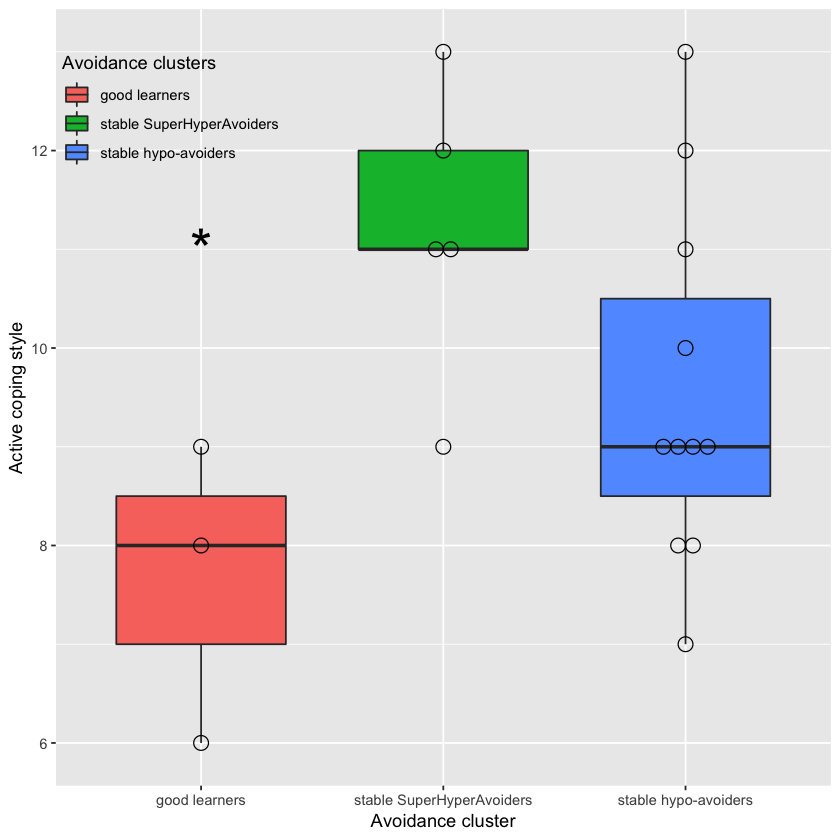

In [243]:
summary(aov(data$Active ~ data$Avoidance_clusters))

t1waybt(data$Active ~ data$Avoidance_clusters, tr = .2, nboot = 599)
mcppb20(data$Active ~ data$Avoidance_clusters, tr = .2, nboot = 599)

ActiveBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Active,
                                    fill=Avoidance_clusters))
ActiveBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.15, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="Active coping style") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) + # Remove border around each item
    annotate("text", x=1, y=11, label="*", size=12)

## Denial coping style

                        Df Sum Sq Mean Sq F value Pr(>F)
data$Avoidance_clusters  2   0.91  0.4542   0.187  0.831
Residuals               16  38.78  2.4235               
6 observations deleted due to missingness

Warning message in t1waybt(data$Denial ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$Denial ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 317.

Test statistic: 0.0153 
p-value: 0.97476 
Variance explained 0.08 
Effect size 0.283 


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

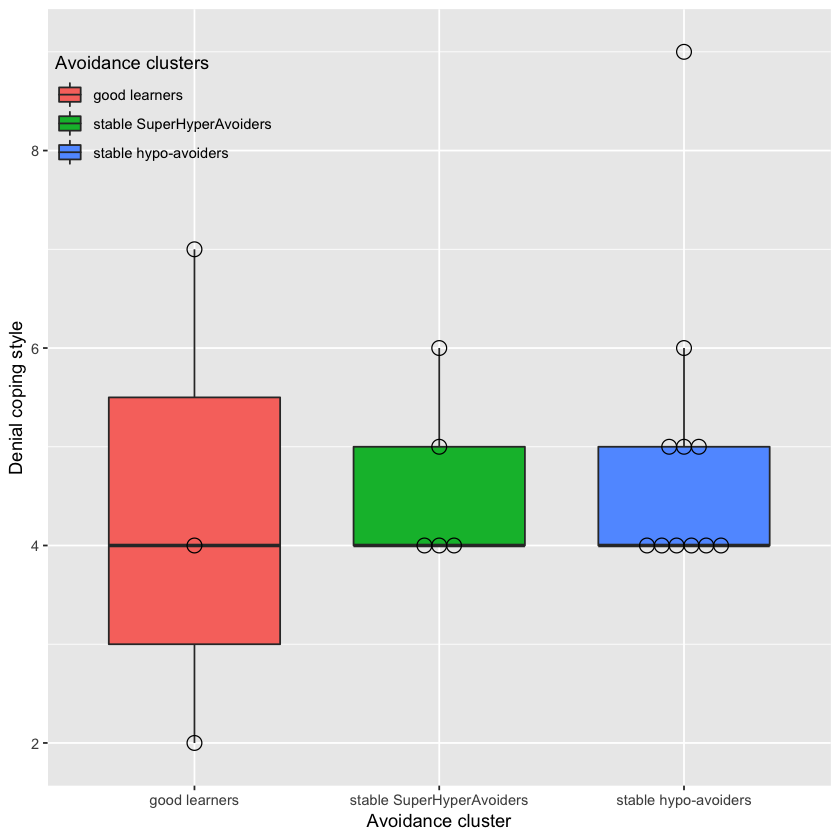

In [224]:
summary(aov(data$Denial ~ data$Avoidance_clusters))

t1waybt(data$Denial ~ data$Avoidance_clusters, tr = .2, nboot = 599)

DenialBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Denial,
                                    fill=Avoidance_clusters))
DenialBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.15, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="Denial coping style") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Religious coping style

                        Df Sum Sq Mean Sq F value Pr(>F)
data$Avoidance_clusters  2  85.76   42.88   2.666    0.1
Residuals               16 257.39   16.09               
6 observations deleted due to missingness

Warning message in t1waybt(data$Religious ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$Religious ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 102.

Test statistic: NaN 
p-value: NaN 
Variance explained 0.528 
Effect size 0.727 


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

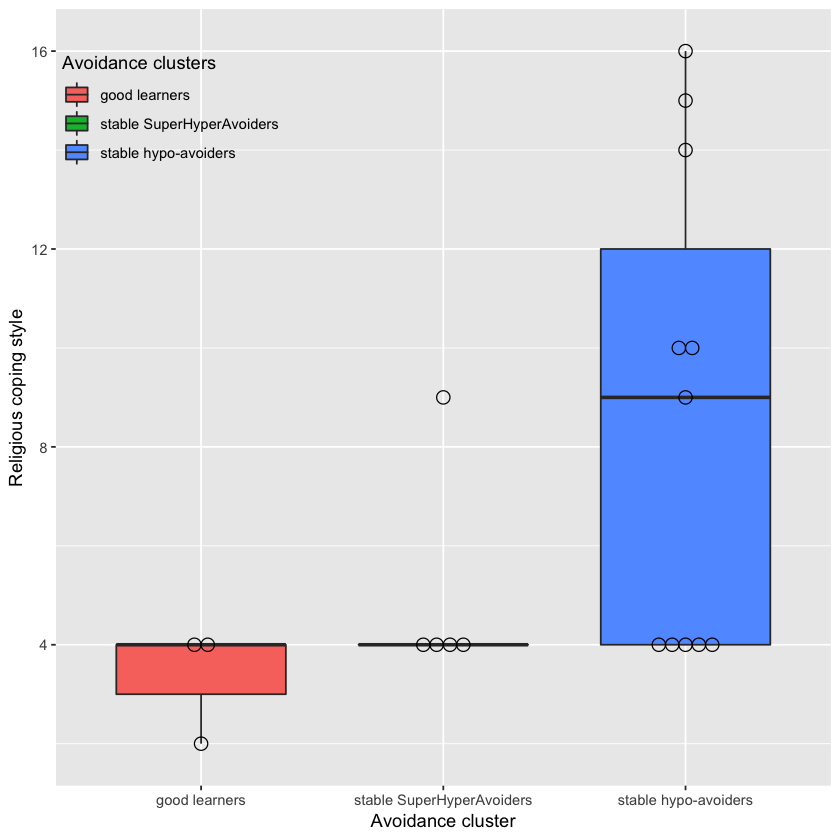

In [223]:
summary(aov(data$Religious ~ data$Avoidance_clusters))

t1waybt(data$Religious ~ data$Avoidance_clusters, tr = .2, nboot = 599)

ReligiousBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Religious,
                                    fill=Avoidance_clusters))
ReligiousBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.27, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="Religious coping style") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Humor coping style

                        Df Sum Sq Mean Sq F value Pr(>F)  
data$Avoidance_clusters  2  92.94   46.47   4.478 0.0285 *
Residuals               16 166.01   10.38                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
6 observations deleted due to missingness

Warning message in t1waybt(data$Humor ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$Humor ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 379.

Test statistic: 3.2166 
p-value: 0.08707 
Variance explained 0.39 
Effect size 0.624 


Call:
mcppb20(formula = data$Humor ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

                                                     psihat  ci.lower ci.upper
stable hypo-avoiders vs. stable SuperHyperAvoiders -7.00000 -11.33333 -1.66667
stable hypo-avoiders vs. good learners             -3.38095  -6.95238  0.38095
stable SuperHyperAvoiders vs. good learners         3.61905  -1.80952  8.28571
                                                   p-value
stable hypo-avoiders vs. stable SuperHyperAvoiders 0.00000
stable hypo-avoiders vs. good learners             0.05008
stable SuperHyperAvoiders vs. good learners        0.14190


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

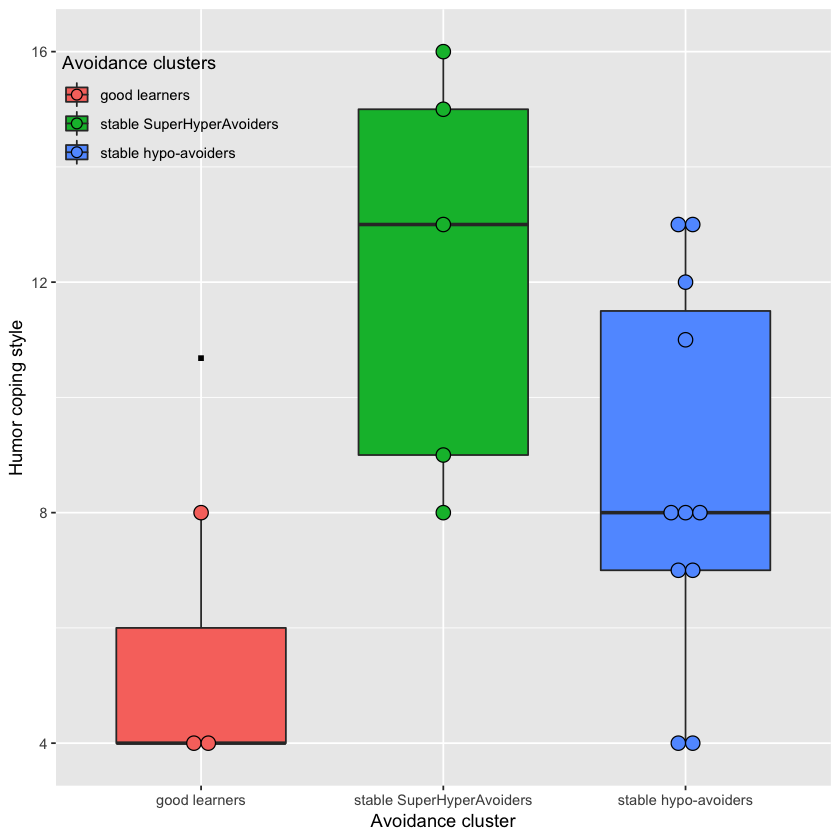

In [244]:
summary(aov(data$Humor ~ data$Avoidance_clusters))

t1waybt(data$Humor ~ data$Avoidance_clusters, tr = .2, nboot = 599)
mcppb20(data$Humor ~ data$Avoidance_clusters, tr = .2, nboot = 599)

HumorBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Humor,
                                    fill=Avoidance_clusters))
HumorBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.25, stackdir="center") +
    labs(x="Avoidance cluster", y="Humor coping style") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) + # Remove border around each item
    annotate("text", x=1, y=11, label=".", size=12)

## Suppression of competing activities coping style

                        Df Sum Sq Mean Sq F value Pr(>F)  
data$Avoidance_clusters  2  42.58  21.291   3.823 0.0439 *
Residuals               16  89.10   5.569                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
6 observations deleted due to missingness

Warning message in t1waybt(data$Suppress ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$Suppress ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 381.

Test statistic: 1.722 
p-value: 0.30446 
Variance explained 1.193 
Effect size 1.092 


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

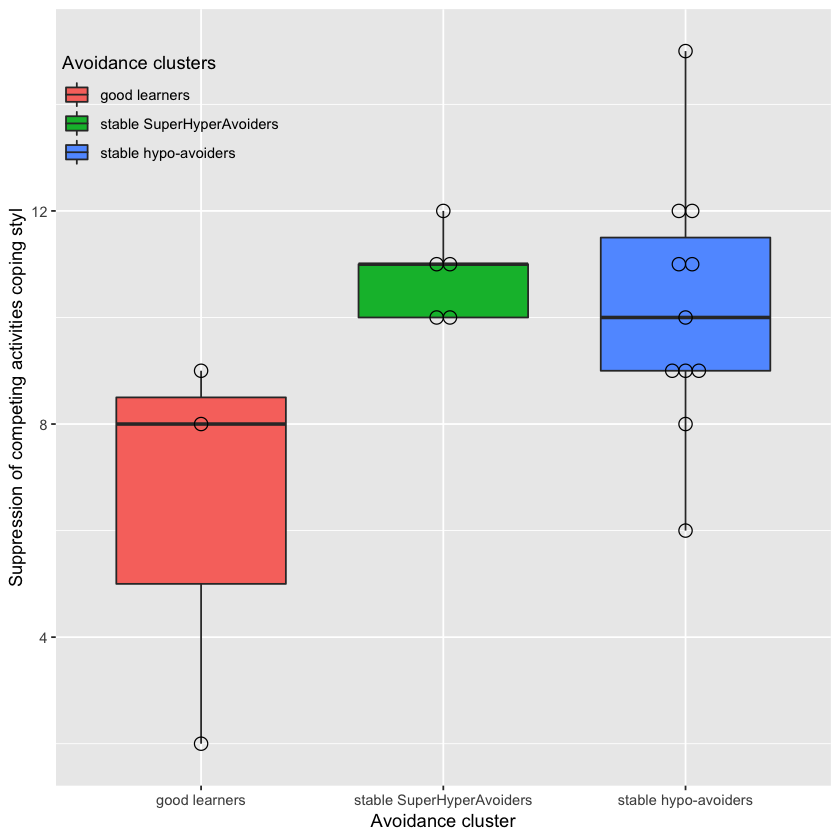

In [226]:
summary(aov(data$Suppress ~ data$Avoidance_clusters))

t1waybt(data$Suppress ~ data$Avoidance_clusters, tr = .2, nboot = 599)

SuppressBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Suppress,
                                    fill=Avoidance_clusters))
SuppressBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.25, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="Suppression of competing activities coping styl") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Mental disengagement coping style

                        Df Sum Sq Mean Sq F value Pr(>F)  
data$Avoidance_clusters  2  21.52  10.762   2.724 0.0959 .
Residuals               16  63.21   3.951                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
6 observations deleted due to missingness

Warning message in t1waybt(data$MentalDis ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$MentalDis ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 483.

Test statistic: 2.5042 
p-value: 0.15114 
Variance explained 0.4 
Effect size 0.632 


Call:
mcppb20(formula = data$MentalDis ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

                                                     psihat ci.lower ci.upper
stable hypo-avoiders vs. stable SuperHyperAvoiders -3.33333 -7.33333  0.66667
stable hypo-avoiders vs. good learners             -1.61905 -3.95238  1.14286
stable SuperHyperAvoiders vs. good learners         1.71429 -1.71429  5.57143
                                                   p-value
stable hypo-avoiders vs. stable SuperHyperAvoiders 0.04841
stable hypo-avoiders vs. good learners             0.12688
stable SuperHyperAvoiders vs. good learners        0.26711


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

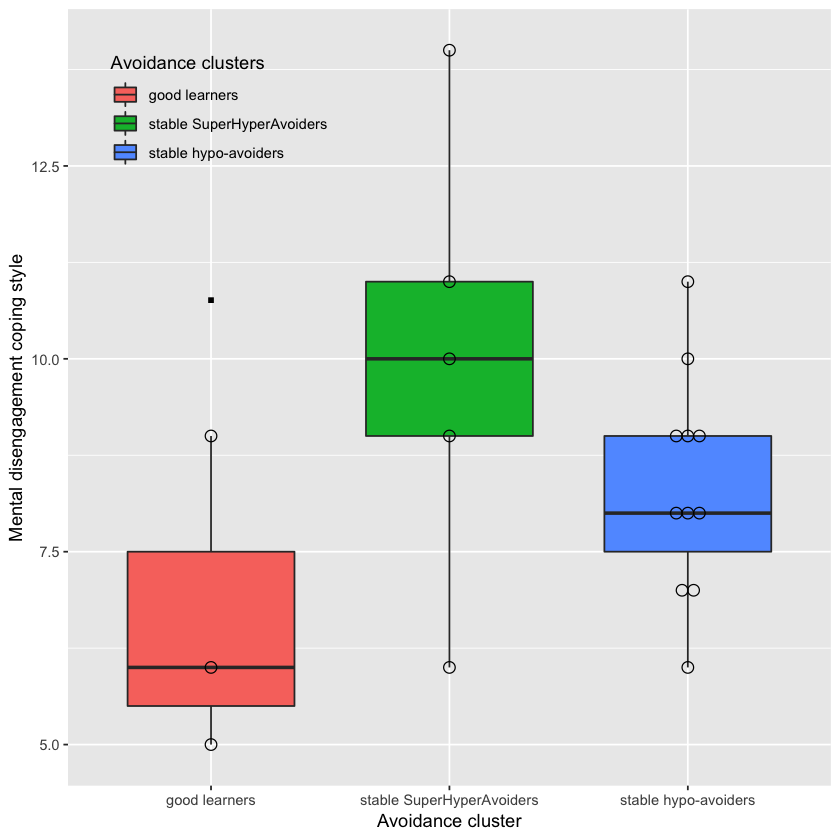

In [245]:
summary(aov(data$MentalDis ~ data$Avoidance_clusters))

t1waybt(data$MentalDis ~ data$Avoidance_clusters, tr = .2, nboot = 599)
mcppb20(data$MentalDis ~ data$Avoidance_clusters, tr = .2, nboot = 599)

MentalDisBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, MentalDis,
                                    fill=Avoidance_clusters))
MentalDisBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.15, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="Mental disengagement coping style") + 
    theme(legend.position=c(0.2,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) + # Remove border around each item
    annotate("text", x=1, y=11, label=".", size=12)

## Behavioral disengagement coping style

                        Df Sum Sq Mean Sq F value Pr(>F)
data$Avoidance_clusters  2   2.43   1.217   0.359  0.704
Residuals               16  54.30   3.394               
6 observations deleted due to missingness

Warning message in t1waybt(data$BehDis ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$BehDis ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 372.

Test statistic: 0.5532 
p-value: 0.52688 
Variance explained 0.062 
Effect size 0.248 


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

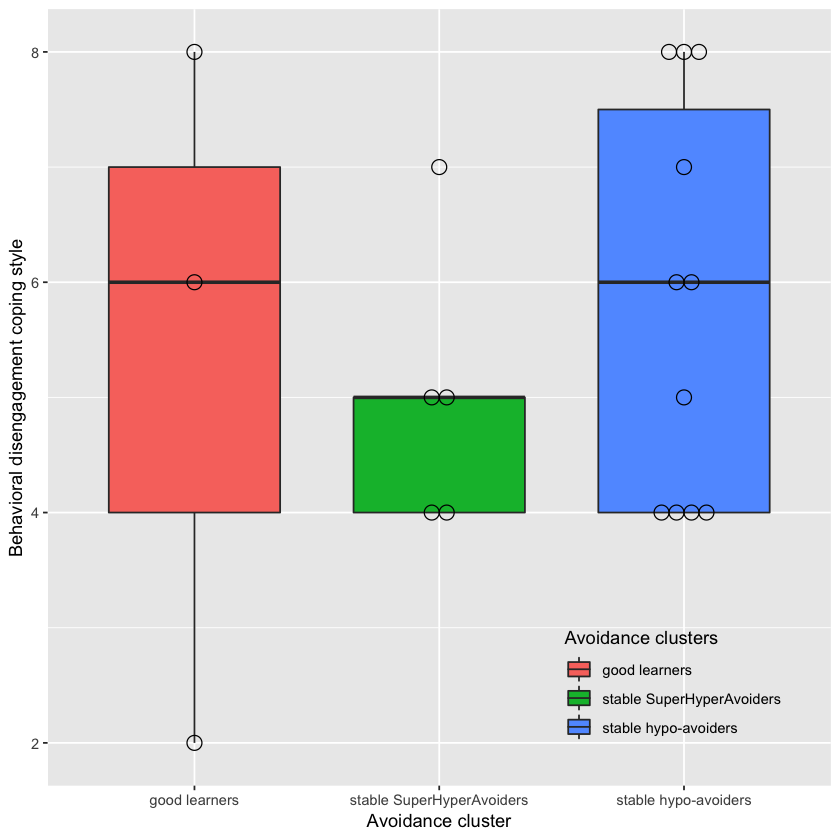

In [228]:
summary(aov(data$BehDis ~ data$Avoidance_clusters))

t1waybt(data$BehDis ~ data$Avoidance_clusters, tr = .2, nboot = 599)

BehDisBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, BehDis,
                                    fill=Avoidance_clusters))
BehDisBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.13, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="Behavioral disengagement coping style") + 
    theme(legend.position=c(0.8,0.13)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Use of emotional social support coping style

                        Df Sum Sq Mean Sq F value Pr(>F)  
data$Avoidance_clusters  2  105.6   52.82   4.694 0.0249 *
Residuals               16  180.1   11.25                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
6 observations deleted due to missingness

Warning message in t1waybt(data$EmoSoc ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$EmoSoc ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 489.

Test statistic: 7.1421 
p-value: 0.02658 
Variance explained 0.231 
Effect size 0.481 


Call:
mcppb20(formula = data$EmoSoc ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

                                                     psihat ci.lower ci.upper
stable hypo-avoiders vs. stable SuperHyperAvoiders  1.00000 -7.66667  5.00000
stable hypo-avoiders vs. good learners             -5.09524 -9.00000 -1.57143
stable SuperHyperAvoiders vs. good learners        -6.09524 -9.85714  1.52381
                                                   p-value
stable hypo-avoiders vs. stable SuperHyperAvoiders 0.86477
stable hypo-avoiders vs. good learners             0.00000
stable SuperHyperAvoiders vs. good learners        0.07012


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

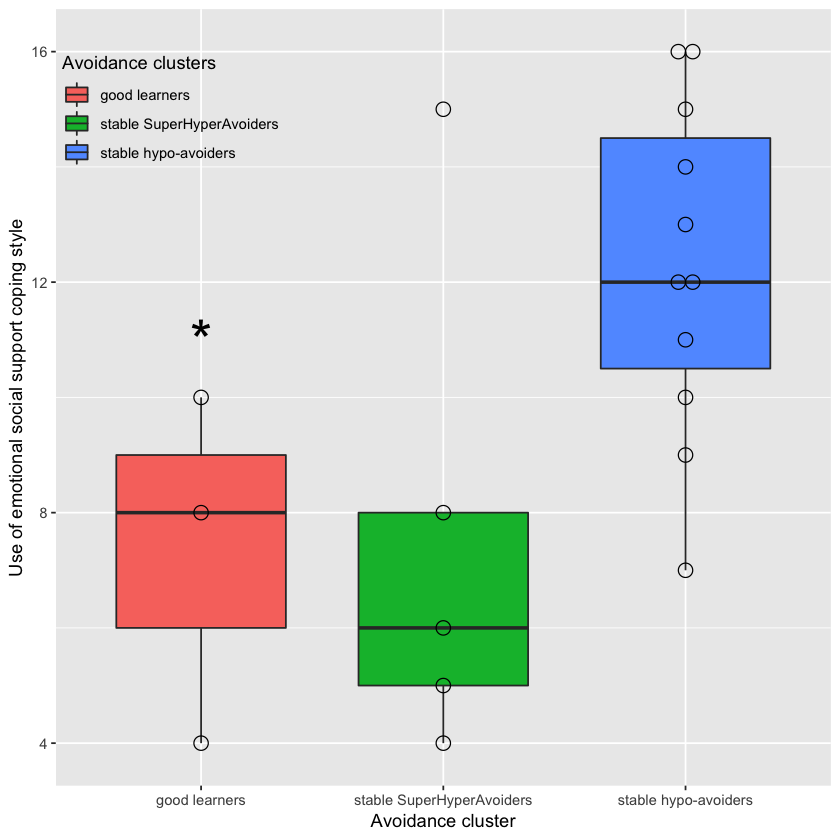

In [246]:
summary(aov(data$EmoSoc ~ data$Avoidance_clusters))

t1waybt(data$EmoSoc ~ data$Avoidance_clusters, tr = .2, nboot = 599)
mcppb20(data$EmoSoc ~ data$Avoidance_clusters, tr = .2, nboot = 599)

EmoSocBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, EmoSoc,
                                    fill=Avoidance_clusters))
EmoSocBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.25, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="Use of emotional social support coping style") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) + # Remove border around each item
    annotate("text", x=1, y=11, label="*", size=12)

## Substance use coping style

                        Df Sum Sq Mean Sq F value Pr(>F)
data$Avoidance_clusters  2  1.911  0.9557    0.84   0.45
Residuals               16 18.194  1.1371               
6 observations deleted due to missingness

Warning message in t1waybt(data$Subst ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$Subst ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 35.

Test statistic: NaN 
p-value: NaN 
Variance explained Inf 
Effect size Inf 


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

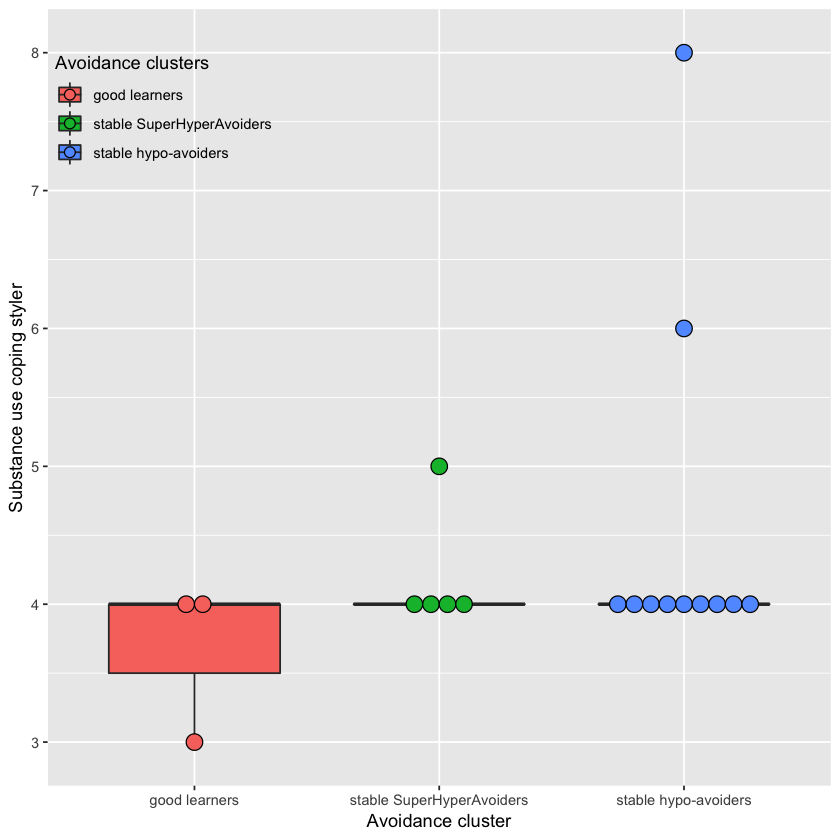

In [230]:
summary(aov(data$Subst ~ data$Avoidance_clusters))

t1waybt(data$Subst ~ data$Avoidance_clusters, tr = .2, nboot = 599)

SubstBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Subst,
                                    fill=Avoidance_clusters))
SubstBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.12, stackdir="center") +
    labs(x="Avoidance cluster", y="Substance use coping styler") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Planning coping style

                        Df Sum Sq Mean Sq F value Pr(>F)  
data$Avoidance_clusters  2  65.16   32.58    4.59 0.0266 *
Residuals               16 113.58    7.10                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
6 observations deleted due to missingness

Warning message in t1waybt(data$Plan ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$Plan ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 355.

Test statistic: 1.4695 
p-value: 0.32676 
Variance explained 0.934 
Effect size 0.966 


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

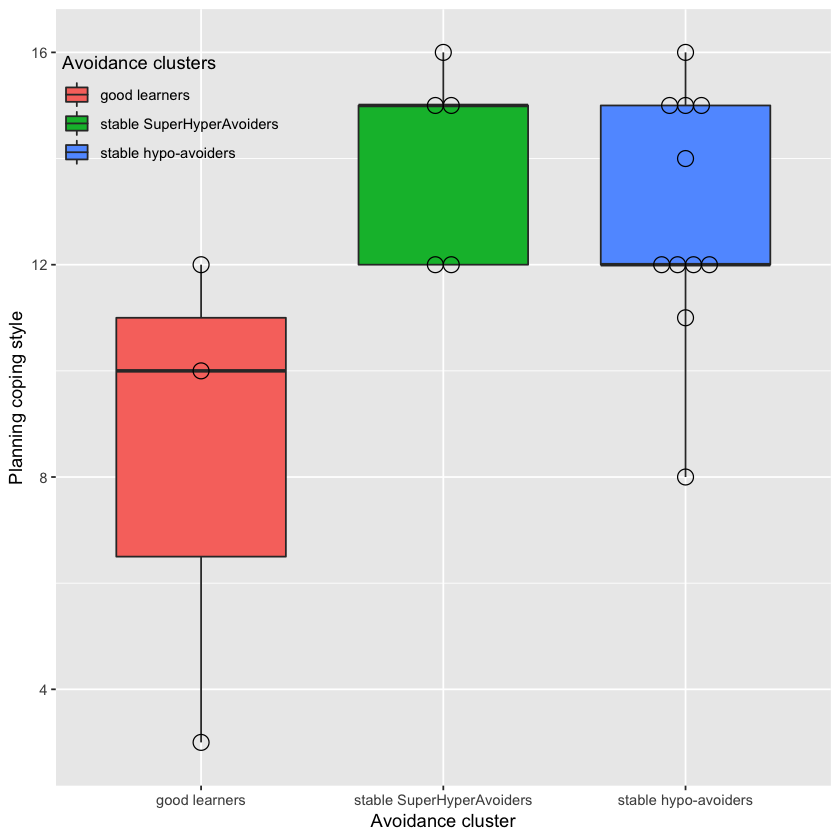

In [231]:
summary(aov(data$Plan ~ data$Avoidance_clusters))

t1waybt(data$Plan ~ data$Avoidance_clusters, tr = .2, nboot = 599)

PlanBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Plan,
                                    fill=Avoidance_clusters))
PlanBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.3, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="Planning coping style") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## PosTot

                        Df Sum Sq Mean Sq F value Pr(>F)  
data$Avoidance_clusters  2   2224  1111.8   5.941 0.0118 *
Residuals               16   2994   187.2                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
6 observations deleted due to missingness

Warning message in t1waybt(data$PosTot ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$PosTot ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 432.

Test statistic: 1.4359 
p-value: 0.44907 
Variance explained 0.964 
Effect size 0.982 


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

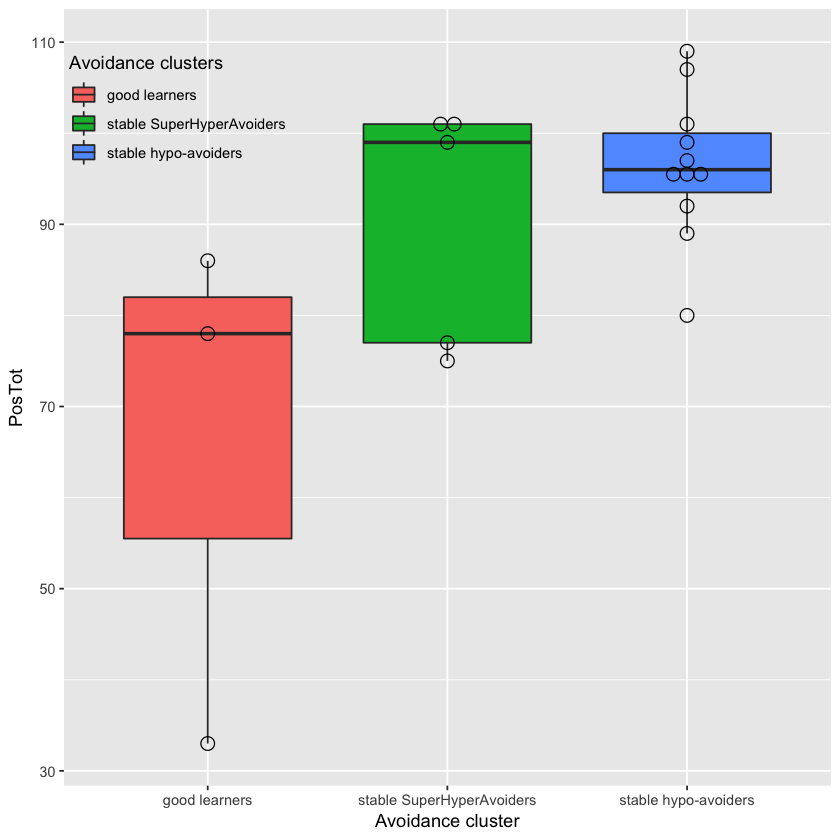

In [232]:
summary(aov(data$PosTot ~ data$Avoidance_clusters))

t1waybt(data$PosTot ~ data$Avoidance_clusters, tr = .2, nboot = 599)

PosTotBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, PosTot,
                                    fill=Avoidance_clusters))
PosTotBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=1.5, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="PosTot") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## NegTot

                        Df Sum Sq Mean Sq F value Pr(>F)  
data$Avoidance_clusters  2  310.7  155.36   3.534 0.0536 .
Residuals               16  703.4   43.96                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
6 observations deleted due to missingness

Warning message in t1waybt(data$NegTot ~ data$Avoidance_clusters, tr = 0.2, nboot = 599):
“Some bootstrap estimates of the test statistic could not be computed.”

Call:
t1waybt(formula = data$NegTot ~ data$Avoidance_clusters, tr = 0.2, 
    nboot = 599)

Effective number of bootstrap samples was 443.

Test statistic: 0.8316 
p-value: 0.44244 
Variance explained 1.149 
Effect size 1.072 


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

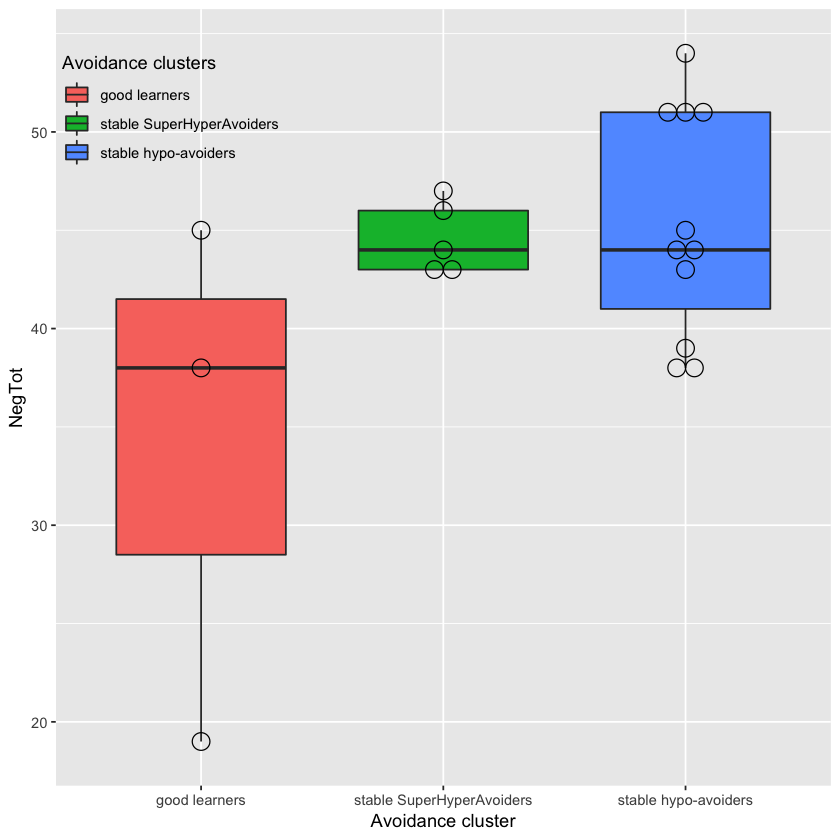

In [233]:
summary(aov(data$NegTot ~ data$Avoidance_clusters))

t1waybt(data$NegTot ~ data$Avoidance_clusters, tr = .2, nboot = 599)

NegTotBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, NegTot,
                                    fill=Avoidance_clusters))
NegTotBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.9, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="NegTot") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

'STAI_S' 'STAI_T' 'BIS' 'AI' 'AllAR' 'STAIS_Group' 'BIS_Group' 'ID2' 'STAIT_Groups'

'BISMedian_Group'   'ShockVolts' 'MeanBP_Avoid' 'Mean_BP_Motor' 'RT_ALL_Avoid' 'RT_ALL_Motor' 'RT_Early_Avoid' 'RT_Late_Avoid' 'RT_Early_Motor' 'RT_Late_Motor' 'Age' 'Ancestry' 'Sex' 'Marital_Status' 'Student' 'Education' 'Yrs_ed' 'WorkingNow'


'VAS_Pre' 'VAS_Post' 'VAS_Task' 'Change_group' 'SumChangePerf'  'PERF_LEARN_GROUP' 'AVG_1ST6' 'AVG_LAST6' 'DIFF'  'Chg2Grp' 'PosRein_Sub' 'Vent_Sub' 'InsSoc_Sub' 'Res_Sub' 'Active_Sub' 'Passive_Sub' 



COPE inventory
“the active coping, planning, suppression, restraint, instrumental social support, emotional social support, positive reinterpretation, acceptance, religion, venting, denial, behavioral disengagement, mental disengagement, and substance use subscales of the COPE”



Barrat’s Impulsivity Scale
'“the attention, motor, self-control, cognitive coping, and perseverance subscales, as well as the total score for the BIS”


'BIS_Total' 'BIS_Attention' 'BIS_Motor' 'BIS_SlfCtl' 'BIS_CogCpx' 'BIS_Prsvr' 'BIS_CogIns' 'BIS_AttImp' 'BIS_MtrImp' 'BIS_NPlImp


Intrinsic Motivation Inventory
“the interest/enjoyment, perceived competence, perceived choice,
and pressure/tension subscales, as well as the total score for the IMI”

'IMITotal' 'IMIInterest' 'IMICompetence' 'IMIEffort' 'IMIPressure' 'IMIRelated'